# Week 7 Machine Learning
- Scott Williamson
- 6-13-24
- https://github.com/scottryanw/datafun-07-ml

##  Introduction
Work with Machine Learning principles to build models, make predictions, and visualize data using pandas, seaborn, matplotlib, and scikit-learn. Models will use simple linear regression to predict future values. 

Completed as part of Data Analytics Fundaments course towards completion of Data Analytics Masters at NW Missouri State University.

### Import Dependencies

In [35]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

## Part 1 - Chart a Straight Line

- Creating lambda to show relationship btween Celsius and Fahrenheit 

In [36]:
%matplotlib inline
c = lambda f: 5 / 9 * (f - 32)

In [37]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [38]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

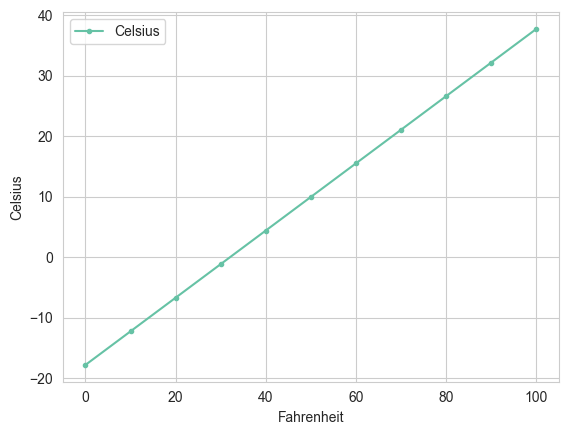

In [39]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

- Loading the Average High Temperatures into a `DataFrame` 

In [40]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [41]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [42]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Cleaning Data

In [43]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [44]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [45]:
nyc.Date = nyc.Date.floordiv(100)

In [46]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Calculating Basic Descriptive Statistics for the Dataset

In [47]:
pd.set_option('display.precision', 2)

In [48]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Forecasting Future January Average High Temperatures

In [49]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [50]:
linear_regression.slope

0.014771361132966163

In [51]:
linear_regression.intercept

8.694993233674289

In [52]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Plotting the Average High Temperatures and a Regression Line 

In [53]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

(10.0, 70.0)

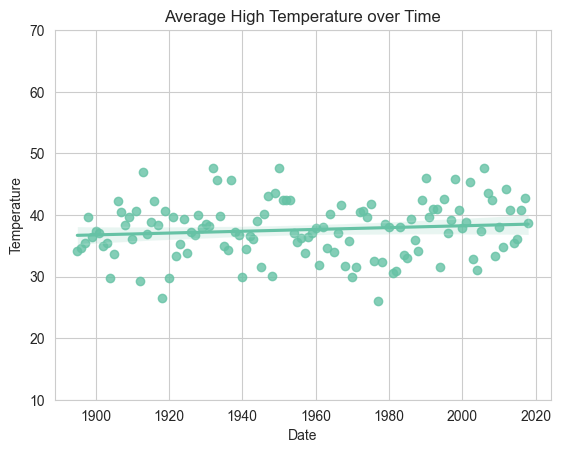

In [54]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
plt.title(f'Average High Temperature over Time')

axes.set_ylim(10, 70)

### Time Series Prediction

In [55]:
year = 2024

In [56]:
slope = linear_regression.slope

In [57]:
intercept = linear_regression.intercept

In [58]:
temperature = slope * year + intercept

In [59]:
while temperature < 40.0:
    year += 1
    temperature = slope * year + intercept

In [60]:
year

2120

Analysis part 1

## Part 2 - Prediction 1

## Part 3 - Prediction 2

## Part 4 - Insights

## Part 5 - Bonus